In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, mean_squared_error, r2_score
from sklearn.metrics import classification_report
import pylab
import scipy.stats as stats
from joblib import dump, load

plt.style.use('fivethirtyeight')

In [2]:
df = pd.read_csv("./diabetes_prediction_dataset.csv")
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [3]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [4]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


<Axes: ylabel='Frequency'>

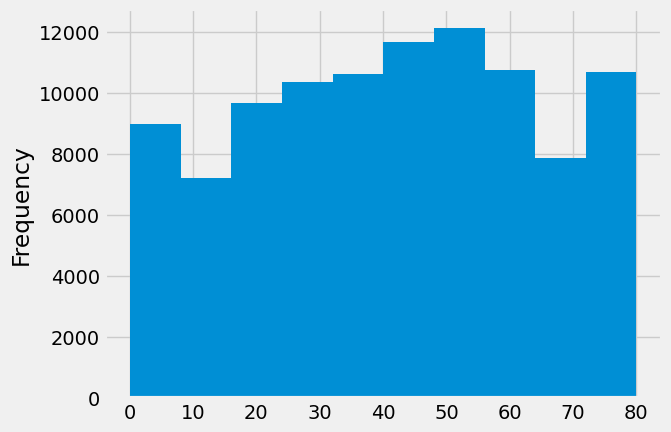

In [5]:

df.age.plot(kind="hist")

In [23]:

df['gender'].value_counts()

gender
Female    58552
Male      41430
Other        18
Name: count, dtype: int64

<Axes: xlabel='gender'>

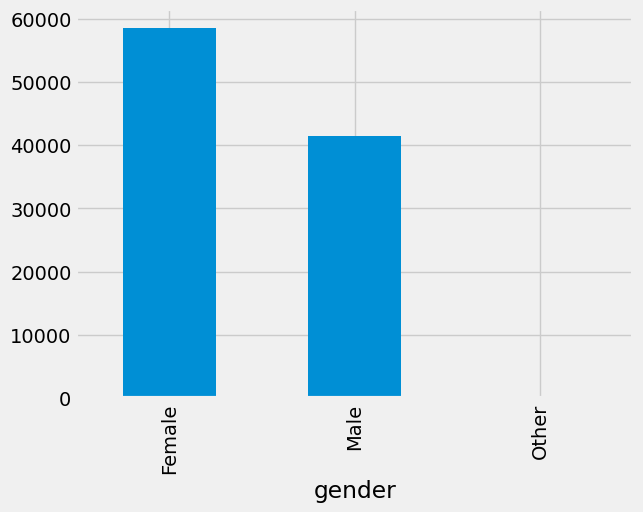

In [7]:
df.gender.value_counts().plot(kind="bar")

In [7]:
df.isnull().sum() 

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [6]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

# 欄位中數值修改

In [3]:
# Create a copy of the DataFrame to preserve the original data
df_copy = df.copy()

# Modify the 'gender' column
df_copy['gender'] = df_copy['gender'].apply(lambda x: 0 if x == 'Male' else (1 if x == 'Female' else 2))


In [4]:
df_copy['gender'].value_counts()

gender
1    58552
0    41430
2       18
Name: count, dtype: int64

In [5]:
# Drop rows where 'smoking_history' is "No Info"   
df_copy = df_copy[df_copy['smoking_history'] != 'No Info']

# Define the mapping dictionary 
mapping = {
    "never": "0",
    "former": "1",
    "not current": "1",
    "current": "5",
    "ever": "10"
}

# Apply the mapping to the 'smoking_history' field     
df_copy['smoking_history'] = df_copy['smoking_history'].map(mapping)

# Save the modified DataFrame to a new CSV file  
df_copy.to_csv('modify_data.csv', index=False)

print("The file has been successfully modified and saved as 'modify_data.csv'.")


The file has been successfully modified and saved as 'modify_data.csv'.


In [73]:
'''
做圖觀察特徵間的關係(sns.pairplot特徵間的分布情形、sns.heatmap特徵間的關聯性)，如果特徵間關聯性大(共線關係)跑模型Regression結果呈現會有問題(因為Regression是把其他變數固定看單一變數與結果的關係)
'''

'\n做圖觀察特徵間的關係(sns.pairplot特徵間的分布情形、sns.heatmap特徵間的關聯性)，如果特徵間關聯性大(共線關係)跑模型Regression結果呈現會有問題(因為Regression是把其他變數固定看單一變數與結果的關係)\n'

# model 

In [6]:
modify_data = pd.read_csv("./modify_data.csv")
# X = modify_data[['smoking_history', 'bmi', 'HbA1c_level', 'blood_glucose_level']]  
# y = modify_data['diabetes']

#全部的columns都看
X = modify_data.iloc[:, :-1].values
y = modify_data.iloc[:, -1].values

In [7]:
modify_data['diabetes'].value_counts()

diabetes
0    57138
1     7046
Name: count, dtype: int64

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=9)
# Standardize features by removing the mean and scaling to unit variance
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test_nor = scaler.transform(X_test)

In [9]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [28]:
w_0 = model.intercept_
w_1 = model.coef_

print('Interception : ', w_0)
print('Coeficient : ', w_1)

Interception :  [-4.64835419]
Coeficient :  [[-0.14853434  0.91901222  0.23589913  0.14149198  0.04910917  0.56882591
   2.55423499  1.40671821]]


In [10]:
model.score(X_test_nor,y_test)

0.9464828230895069

In [11]:
model.score(X_train, y_train)

0.9498510136911601

In [12]:
y_pred = model.predict(X_test_nor)
# Save the model to disk
# dump(model, 'DM_logistic_model.joblib')

In [26]:
# Calculate evaluation metrics
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
coefficients = model.coef_
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


print(modify_data.columns)

# Print the evaluation metrics
print("Confusion Matrix:\n", cm)
print("Accuracy Score:", acc)
print("Model Coefficients:\n", coefficients)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R²):", r2)



Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')
Confusion Matrix:
 [[11255   152]
 [  535   895]]
Accuracy Score: 0.9464828230895069
Model Coefficients:
 [[-0.14853434  0.91901222  0.23589913  0.14149198  0.04910917  0.56882591
   2.55423499  1.40671821]]
Mean Squared Error (MSE): 0.053517176910493104
R-squared (R²): 0.4593542426715038


### Accuracy Score vs  Visualizing the Confusion Matrix

Confusion Matrix:
 [[11255   152]
 [  535   895]]
Accuracy Score: 0.9464828230895069
Model Coefficients:
 [[-0.14853434  0.91901222  0.23589913  0.14149198  0.04910917  0.56882591
   2.55423499  1.40671821]]


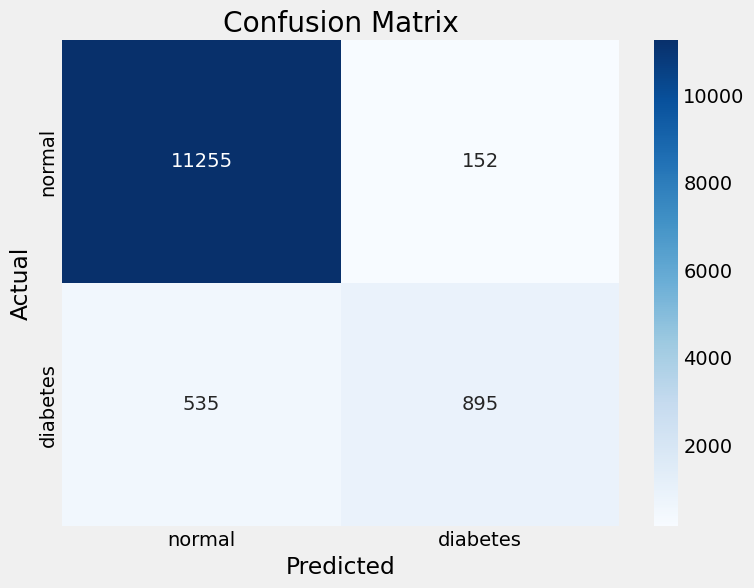


Classification Report:
               precision    recall  f1-score   support

      normal       0.95      0.99      0.97     11407
    diabetes       0.85      0.63      0.72      1430

    accuracy                           0.95     12837
   macro avg       0.90      0.81      0.85     12837
weighted avg       0.94      0.95      0.94     12837



In [24]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate the accuracy score
acc = accuracy_score(y_test, y_pred)

# Print the evaluation metrics
print("Confusion Matrix:\n", cm)
print("Accuracy Score:", acc)

# Get the coefficients of the model
coefficients = model.coef_

# Print the coefficients
print("Model Coefficients:\n", coefficients)

# Visualizing the Confusion Matrix
# Replace '0' with 'normal' and '1' with 'diabetes' for labels
labels = ['normal', 'diabetes']
cm_df = pd.DataFrame(cm, index=labels, columns=labels)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Print the classification report
# classification_report 
report = classification_report(y_test, y_pred, target_names=labels)
print("\nClassification Report:\n", report)